## Pandas 1: Introduction to Pandas

Problem 1:

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def make_series():
    s1 = pd.Series(-3, index=np.arange(5))
    
    d = {'Bill': 31, 'Sarah': 28, 'Jane': 34, 'Joe': 26}
    s2 = pd.Series(d)
    
    print(s1,'\n', s2)
    

In [7]:
make_series()

0   -3
1   -3
2   -3
3   -3
4   -3
dtype: int64 
 Bill     31
Jane     34
Joe      26
Sarah    28
dtype: int64


Problem 2:

In [108]:
def random_walk():
    plt.figure(figsize=(5, 15))
    N = 100
    s = np.zeros((N,5))
    for i in range(0,5):
        
        s[1:,i]=np.random.binomial(1, 0.5, size=(N-1))*2-1
    s = pd.DataFrame(s)
    s = s.cumsum()
    plt.subplot(411)
    plt.plot(s)
    plt.ylim([-50,50])
    
 
    # biased walk
    for i in range(3):
        if i == 0:
            N_b = 100
        elif i == 1:
            N_b = 10000
        else: 
            N_b = 100000
        b = np.zeros(N_b)
        b[1:] = np.random.binomial(1, 0.51, size=(N_b-1))*2-1
        b = pd.Series(b)
        b = b.cumsum()
        plt.subplot(4, 1, i+2)
        plt.plot(b)
        #plt.ylim([-N_b/2, N_b/2])
    
    plt.show()
        

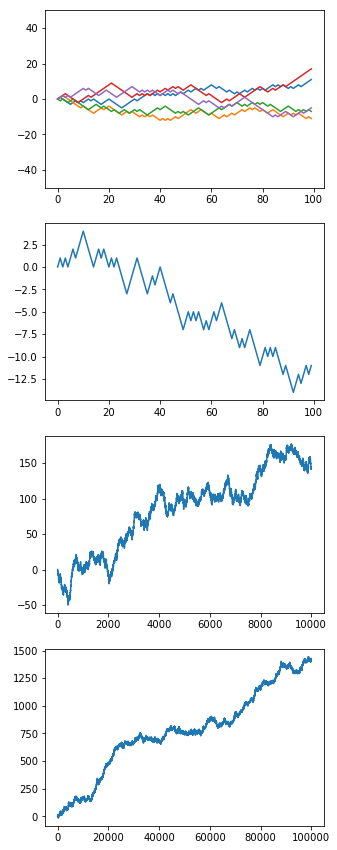

In [109]:
random_walk()

Problem 3/4:

In [110]:
def select_data():
    #build toy data for SQL operations
    name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', ' -'
    'Alexander', 'JeanMarie']
    sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
    age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
    rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
    ID = range(9)
    aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
    GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
    mathID = [0, 1, 5, 6, 3]
    mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
    major = ['y', 'n', 'y', 'n', 'n']
    studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age,
                                'Class': rank})
    otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
    mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})
    
    (studentInfo[studentInfo['Age'] > 19]['ID', 'Name']) & (studentInfo[studentInfo['Sex']=='M']['ID','Name'])                       
    
    b = pd.merge(studentInfo, otherInfo, on='Sex')[['ID','Age','GPA']]
    

Problem 5:

In [278]:
def load_data():
    # load data into DataFrame, use column names in file, "year" 
    # as index, skip lines without data
    
    df = pd.read_csv("crime_data.txt", skiprows=[0], index_col="Year")
    df.dropna()
    
    s = pd.DataFrame(df["Total"]/df["Population"], columns=['Rate'])
    df = pd.merge(s, df, left_index=True, right_index=True)

    plt.figure(figsize=(10,10))
    plt.subplot(211)
    plt.plot(s)
    plt.title("Crime Rate by Year")
    plt.ylabel("Crime Rate")
    plt.xlabel("Year")
    plt.show()
    
    top_five = df.sort_values('Rate', ascending=False).iloc[:5,0]
    print(top_five,'\n')
    
    avg_total = df['Total'].mean()
    avg_burg = df['Burglary'].mean()
    print('Average total crime:', int(avg_total), 
          '\nAverage burglary:', int(avg_burg))
    
    print("\nYears for which total crime was below average, but burglaries were\
    \nabove average:")
    cond = df[(df['Total']<avg_total)&(df['Burglary']>avg_burg)][['Total','Burglary']]
    print(cond)
    
    plt.figure(figsize=(10,10))
    plt.subplot(212)
    plt.plot(df['Population'], df['Murder'])
    plt.title("Number of Murders by Population")
    plt.xlabel("Population (Hundreds of Millions)")
    plt.ylabel("Number of Murders")
    plt.show()
    
    # saving pop, violent, robbery as separate .csv crime_subset.txt
    subset = df[['Population','Violent','Robbery']]
    subset.to_csv("crime_subset.txt")
    
    
    

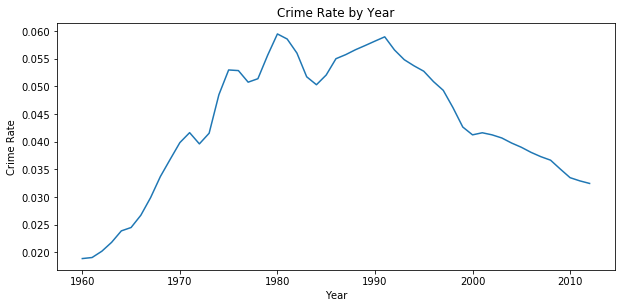

Year
1980    0.059500
1991    0.058978
1981    0.058582
1990    0.058203
1989    0.057410
Name: Rate, dtype: float64 

Average total crime: 10638068 
Average burglary: 2446286

Years for which total crime was below average, but burglaries were    
above average:
         Total  Burglary
Year                    
1973   8718100   2565500
1974  10253400   3039200


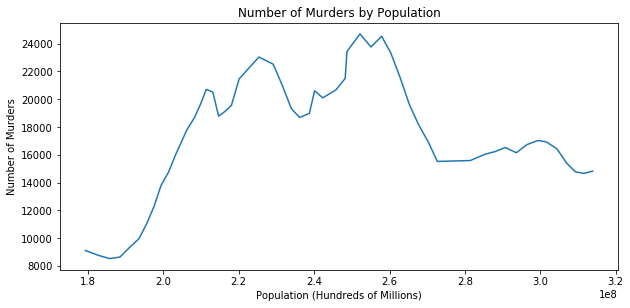

In [279]:
load_data()